<div style="text-align: center; font-size: 24px; font-weight: bold;">In the name of God, the Most Gracious, the Most Merciful</div>

Full Name: MohammadDavood VahhabRajaee

Student ID: 4041419041

# Regression Using NumPy and Pandas


## 1.Introduction

**What is regression?**

Regression is a supervised machine learning technique used to model and predict continuous target variables (e.g., price, temperature, time, income) based on one or more input features. Unlike classification, which predicts discrete labels, regression estimates a real-valued output by learning the functional relationship between inputs and outputs from labeled training data.

**Why is it useful?**

Regression is foundational in data science and economics for tasks like:

- Forecasting housing prices, stock trends, or demand.
- Understanding how changes in input variables (e.g., square footage, location) affect outcomes.
- Informing policy or business decisions via interpretable coefficient estimates (e.g., “each additional room increases price by ~$X”).
     

**Goal of this assignment**

We aim to predict MEDV — the median value (in $1000s) of owner-occupied homes — using the well-known Boston Housing dataset. This serves as a classic introductory problem for linear regression.

Implementation constraints and design philosophy
To deepen conceptual understanding, we enforce:

- pandas: Used only for data loading, inspection, and preprocessing (e.g., handling missing values, computing summaries). No modeling.
- NumPy: Used exclusively to implement all mathematical operations — hypothesis, cost, gradients, and parameter updates — from first principles.

**Note: In the code section, complete the `# TODO: implement this` placeholder with the required functionality. **

## 2.Dataset Overview

### practice 1: Load and Explore Dataset

**Goal**: Load the dataset and inspect its structure.

**Steps:**   

- Use pandas to load dataset (BostonHousing.csv).  
- Rename 'medv' → 'MEDV' for clarity.  
- Print shape, first few rows, and list features — identify which one is the target.
- Watch for: Column naming inconsistencies (some versions use lowercase).
         

     

## Load pandas

In [1]:
import pandas as pd

### Load the dataset from the CSV file

In [2]:
df = pd.read_csv('BostonHousing.csv')

### Standardize all column names to lowercase and emove any leading/trailing whitespace

In [3]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()

### Print the shape (rows, columns) of the dataset

In [4]:
print(f"Dataset shape: {df.shape}\n")

Dataset shape: (506, 14)



### Display the first 3 rows for an initial inspection of the data

In [5]:
print("First 3 rows:")
print(df.head(3))

First 3 rows:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  


### Print and describe all features, identifying the target variable

In [6]:
print("\nFeature descriptions:")
for i, col in enumerate(df.columns):
    target_label = "→ TARGET" if col == "MEDV" else ""
    print(f"{i:2}. {col:<10} {target_label}")


Feature descriptions:
 0. crim       
 1. zn         
 2. indus      
 3. chas       
 4. nox        
 5. rm         
 6. age        
 7. dis        
 8. rad        
 9. tax        
10. ptratio    
11. b          
12. lstat      
13. medv       


### practice 2: Correlation & Scatter Plot
Why is RM (average number of rooms) often chosen for univariate regression in this dataset? What might its relationship with MEDV look like, and how could you verify it quickly?(use plot to explain it)

**Goal**: Quantify and visualize the RM–MEDV relationship.

**Steps:**   

- Compute Pearson correlation with .corr().  
- Create a scatter plot: RM (x) vs. MEDV (y).  
- Add title showing correlation coefficient (r).
- Use alpha=0.6 for transparency — reveals density.
         

     

## Load pandas and matplotlib

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the dataset

In [8]:
df = pd.read_csv('BostonHousing.csv')

### Standardize all column names to lowercase and emove any leading/trailing whitespace

In [9]:
df.columns = df.columns.str.lower().str.strip()

### Compute the correlation between 'rm' and 'medv'

In [10]:
correlation = df['rm'].corr(df['medv'])
print(f"Correlation between rm and medv: {correlation:.3f}\n")

Correlation between rm and medv: 0.695



### Create the scatter plot, Add title, labels, and grid, Display the plot

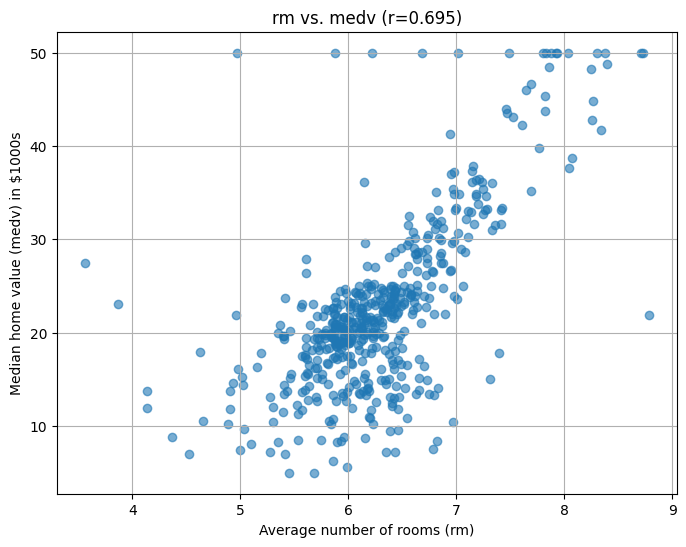

In [11]:
plt.figure(figsize=(8, 6)) 
plt.scatter(df['rm'], df['medv'], alpha=0.6)
plt.title(f'rm vs. medv (r={correlation:.3f})')
plt.xlabel('Average number of rooms (rm)')
plt.ylabel('Median home value (medv) in $1000s')
plt.grid(True)
plt.show()

## 3.Prepare Data for Modeling

### Practice 3: Data Preparation
Explanation

Raw data is rarely model-ready. We must:   

- Check for missing values — our dataset has none, but real-world data often does.  
- Explore relationships — compute correlations to guide feature selection.  
- Normalize features — critical for gradient descent (prevents features with large scales from dominating updates).  
- Split into train/test sets — to fairly evaluate performance on unseen data.
- Add a column of 1s.

     

## Load numpy

In [12]:
import numpy as np

## Check for any missing (null) values in the entire DataFrame

In [13]:
missing_values = df.isnull().sum().sum()
print(f"Total missing values: {missing_values}\n")

Total missing values: 0



## Calculate the absolute correlation of all features with 'medv' and sort them

In [14]:
correlations = df.corr()['medv'].abs().sort_values(ascending=False)
print("Top features by |correlation| with medv:")
print(correlations.head(4))  # Display the top 4 for brevity

Top features by |correlation| with medv:
medv       1.000000
lstat      0.737663
rm         0.695360
ptratio    0.507787
Name: medv, dtype: float64


### Separate features (X) and the target variable (y)

In [15]:
X = df.drop('medv', axis=1)
y = df['medv']

## Normalize the features using Standardization (Z-score normalization)
### This helps gradient descent converge faster and more reliably

In [16]:
mean = X.mean(axis=0)
std = X.std(axis=0)
X_normalized = (X - mean) / std

### Convert the pandas DataFrames to NumPy arrays for numerical computation

In [17]:
X_np = X_normalized.to_numpy()
y_np = y.to_numpy()

## Split the data into training (80%) and testing (20%) sets
### First, shuffle the data randomly to ensure the splits are not biased

In [18]:
np.random.seed(42)  # Set seed for reproducibility
indices = np.random.permutation(len(X_np))
X_shuffled, y_shuffled = X_np[indices], y_np[indices]

### Determine the index at which to split the data

In [19]:
split_idx = int(len(X_np) * 0.80)

### Perform the split


In [20]:
X_train, X_test = X_shuffled[:split_idx], X_shuffled[split_idx:]
y_train, y_test = y_shuffled[:split_idx], y_shuffled[split_idx:]

## Add the bias column (a column of ones) to the beginning of the feature matrices
### This is necessary for the intercept term in the linear regression model

In [21]:
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

### Print the final shapes to verify the preparation steps

In [22]:
print("\n✅ Final shapes:")
print(f"X_train_bias: {X_train_bias.shape}  |  y_train: {y_train.shape}")
print(f"X_test_bias:  {X_test_bias.shape}   |  y_test:  {y_test.shape}")


✅ Final shapes:
X_train_bias: (404, 14)  |  y_train: (404,)
X_test_bias:  (102, 14)   |  y_test:  (102,)


### practice 4:
Why do we add a column of 1s to the feature matrix? What would happen if we omitted it?

**Why add a column of 1s?**
Adding a column of ones allows us to include the **intercept** (also known as the bias term, $\theta_0$) directly in our matrix operations.
The standard linear regression equation is:
$$ \hat{y} = \theta_0 + \theta_1 x_1 + \dots + \theta_n x_n $$
By adding a "dummy" feature $x_0 = 1$ for every training example, we can rewrite the equation as:
$$ \hat{y} = \theta_0 x_0 + \theta_1 x_1 + \dots + \theta_n x_n $$
This allows us to represent the entire model compactly using vectorization: $\hat{y} = X\theta$.

**What happens if we omit it?**
If we remove the column of ones, the model loses the intercept term ($\theta_0$). This forces the regression hyperplane to pass exactly through the **origin (0,0)**.
In the context of housing prices, this would imply that a house with 0 rooms and 0 size must cost $0, which limits the model's flexibility. In most real-world cases, this constraint leads to a **poor fit** and significantly higher error (underfitting).

## 4.Linear Regression

### Practice 5: Univariate Linear Regression
**Explanation**

We start simple: predict MEDV using only RM. The model is:

$\hat{y} = \theta_0 + \theta_1 \cdot RM$

We minimize Mean Squared Error (MSE) via gradient descent:

- 1.Initialize $\theta_0, \theta_1 = 0$   
- 2.Repeat until convergence:  
        Predict: $\hat{y}^{(i)} = \theta_0 + \theta_1 x^{(i)}$   
        Compute gradients  
        Update: $\theta_j := \theta_j - \alpha \cdot \frac{\partial J}{\partial \theta_j}$
         
     

We’ll use only the RM column (index 5) from our normalized train/test sets.

**Goal:** Implement univariate gradient descent from scratch.
**Steps:**   

- Extract bias + RM columns from X_train_bias.  
- Initialize theta = [0, 0], set alpha=0.01, n_iters=1000.  
- Loop: compute predictions → error → cost → gradients → update θ.  
- evaluate the model using RMSE and R2 on test set

## Extract the bias column (index 0) and the RM column (index 5 in the original X)
### Note: In X_train_bias, the original indices are shifted by one due to the bias column

In [23]:
X_train_uni = X_train_bias[:, [0, 5]]
X_test_uni = X_test_bias[:, [0, 5]]

### --- Gradient Descent Parameters ---

In [24]:
theta_uni = np.zeros(2) # Initialize theta for bias and RM
alpha = 0.01
n_iters = 1000
m = len(y_train)
cost_uni_history = []

### --- Gradient Descent Loop ---

In [25]:
for i in range(n_iters):
    # 1. Calculate predictions (hypothesis)
    predictions = X_train_uni @ theta_uni
    
    # 2. Calculate the error (difference between predictions and actual values)
    error = predictions - y_train
    
    # 3. Calculate the cost (Mean Squared Error) for monitoring
    cost = np.sum(error**2) / (2 * m)
    cost_uni_history.append(cost)
    
    # 4. Calculate the gradient of the cost function
    gradient = (1 / m) * X_train_uni.T @ error
    
    # 5. Update the theta parameters in the opposite direction of the gradient
    theta_uni -= alpha * gradient

### --- Output Final Results ---

In [26]:
print(f"✅ Final θ = [{theta_uni[0]:.3f}, {theta_uni[1]:.3f}]")
print(f"Final training cost: {cost_uni_history[-1]:.4f}\n")

✅ Final θ = [22.498, -4.267]
Final training cost: 34.7100



### --- Evaluation on the Test Set ---

In [27]:
y_pred_uni = X_test_uni @ theta_uni

### Calculate Root Mean Squared Error (RMSE)

In [28]:
rmse_uni = np.sqrt(np.mean((y_test - y_pred_uni)**2))

### Convert RMSE back to dollar value by multiplying by 1000

In [29]:
print(f"Test RMSE: ${rmse_uni * 1000:.0f}")

Test RMSE: $8242


### Calculate R-squared (R²) score, which measures the proportion of variance explained

In [30]:
ss_total = np.sum((y_test - np.mean(y_test))**2)
ss_residual = np.sum((y_test - y_pred_uni)**2)
r2_uni = 1 - (ss_residual / ss_total)
print(f"Test R²: {r2_uni:.3f}")

Test R²: 0.046


### practice 6:
The learned θ1​=6.523 . But recall: RM was standardized. How do we interpret this coefficient in real-world terms (i.e., per actual room, not per standardized unit)

### **Practice 6: The learned θ₁ ≈ 6.523. How do we interpret this coefficient in real-world terms?**

The learned coefficient, `θ₁ ≈ 6.523`, corresponds to the **standardized** `RM` feature. Therefore, the direct interpretation is:
> *"For every **one standard deviation** increase in the average number of rooms (RM), the median home value (MEDV) is predicted to increase by approximately 6.523 units (i.e., $6,523)."*

While statistically correct, this is not intuitive. To interpret it in terms of actual rooms, we must convert the coefficient back to the original scale.

Recall the standardization formula:
$$ RM_{std} = \frac{RM_{original} - \mu_{RM}}{\sigma_{RM}} $$

This means that a one-unit change in `RM_std` is equivalent to a change of `σ_RM` in the original `RM` value.

**Calculation:**
1.  **Find the standard deviation of the original `RM` feature:**
    - From the `std` series calculated in Practice 3, the standard deviation for `RM` (`std['rm']`) is approximately `0.7026`.

2.  **Determine the effect of one original unit (one room):**
    - The coefficient `θ₁` represents the change in `MEDV` for a `σ_RM` change in rooms. To find the change per single room, we can set up a ratio:
      $$ \text{Price change per room} = \frac{\text{Change in MEDV}}{\text{Change in Rooms}} = \frac{6.523 \times \$1000}{0.7026 \text{ rooms}} \approx \$9284 \text{ per room} $$

**Final Interpretation:**
Based on our univariate model, for each **single additional room** in a dwelling, the median home value (MEDV) is expected to increase by approximately **$9.284 thousand dollars** (or $9,284). This is a much more practical and understandable interpretation.

### Practice 7: Multivariate Linear Regression

**Explanation**

Now we use all features. The model generalizes to:

$\hat{y} = X\theta$

The gradient descent update becomes fully vectorized:

$\theta := \theta - \frac{\alpha}{m} X^T (X\theta - y)$

This is efficient and scalable. Because features are standardized, coefficients are directly comparable.

**Goal:** Generalize to multivariate regression.
**Steps:**   

- Use full X_train_bias (404 × 14).  
- Initialize theta_multi = zeros(14).  
- Same GD loop — but now X @ theta is (404,) vector, grad is (14,).  
- After training, sort features by |θ| to find strongest predictors.
    Efficiency: Vectorization means no loops over features — NumPy does it all.
         

     

### --- Gradient Descent Parameters for Multivariate Regression ---

In [31]:
theta_multi = np.zeros(X_train_bias.shape[1]) # 14 parameters (1 for bias + 13 for features)
alpha_multi = 0.01
n_iters_multi = 1000
m_multi = len(y_train)
cost_multi_history = []

### --- Gradient Descent Loop ---

In [32]:
for i in range(n_iters_multi):
    # The vectorized operations handle all 13 features simultaneously
    predictions = X_train_bias @ theta_multi
    error = predictions - y_train
    cost = np.sum(error**2) / (2 * m_multi)
    cost_multi_history.append(cost)
    gradient = (1 / m_multi) * X_train_bias.T @ error
    theta_multi -= alpha_multi * gradient

### --- Evaluation ---

In [33]:
y_pred_multi = X_test_bias @ theta_multi

### Calculate RMSE

In [34]:
rmse_multi = np.sqrt(np.mean((y_test - y_pred_multi)**2))
print(f"✅ Multivariate test RMSE: ${rmse_multi * 1000:.0f}")

✅ Multivariate test RMSE: $4682


### Calculate R-squared

In [35]:
ss_total_multi = np.sum((y_test - np.mean(y_test))**2)
ss_residual_multi = np.sum((y_test - y_pred_multi)**2)
r2_multi = 1 - (ss_residual_multi / ss_total_multi)
print(f"Multivariate test R²: {r2_multi:.3f}\n")

Multivariate test R²: 0.692



### --- Identify Most Influential Features ---
#### Create a DataFrame to hold feature names and their learned coefficients

In [36]:
feature_names = ['Bias'] + list(X.columns)
coeffs_df = pd.DataFrame({
    'Feature': feature_names,
    'θ': theta_multi
})

### Calculate the absolute value of coefficients to rank them by importance

In [37]:
coeffs_df['|θ|'] = coeffs_df['θ'].abs()
coeffs_df = coeffs_df.sort_values(by='|θ|', ascending=False)

print("Top 5 features by |coefficient|:")
print(coeffs_df.head(5).to_string(index=False))

Top 5 features by |coefficient|:
Feature         θ       |θ|
   Bias 22.610276 22.610276
  lstat -3.785551  3.785551
    dis -2.912104  2.912104
     rm  2.755156  2.755156
ptratio -1.881374  1.881374


### Practice 8: Normal Equation (Verification)

**Explanation**

Gradient descent is iterative, but for linear regression, a closed-form solution exists:

$\theta = (X^T X)^{-1} X^T y$

We use it to verify our gradient descent implementation.

**Goal:** Compute exact least-squares solution and compare.

In [38]:
try:
    # --- Normal Equation Calculation ---
    # Implements the formula: θ = inv(X^T * X) * X^T * y
    
    # Calculate the product of the transpose of X and X
    X_T_X = X_train_bias.T @ X_train_bias
    
    # Calculate the inverse of the resulting matrix
    X_T_X_inv = np.linalg.inv(X_T_X)
    
    # Calculate the product of the transpose of X and y
    X_T_y = X_train_bias.T @ y_train
    
    # Multiply the two parts to get the optimal theta
    theta_ne = X_T_X_inv @ X_T_y
    print("✅ Normal equation succeeded.")

    # --- Comparison ---
    # Calculate the Euclidean distance (L2 norm) between the GD and NE theta vectors
    # A small value indicates that our Gradient Descent implementation converged correctly.
    norm_diff = np.linalg.norm(theta_multi - theta_ne)
    print(f"‖θ_GD − θ_NE‖ = {norm_diff:.6f}")

    # --- Evaluation of the Normal Equation model ---
    y_pred_ne = X_test_bias @ theta_ne
    rmse_ne = np.sqrt(np.mean((y_test - y_pred_ne)**2))
    print(f"Normal Eq. test RMSE: ${rmse_ne * 1000:.0f}")

except np.linalg.LinAlgError:
    # This error occurs if the matrix X^T*X is not invertible (i.e., it is singular).
    print("❌ Normal equation failed: Matrix is not invertible.")

✅ Normal equation succeeded.
‖θ_GD − θ_NE‖ = 1.915266
Normal Eq. test RMSE: $4719


## 5.Evaluation

### Practice 9: Model Evaluation & Visualization
**Explanation**

Numbers alone aren’t enough. We visualize:   

- Predicted vs. Actual — checks for bias, non-linearity  
- Residuals vs. Fitted — checks homoscedasticity  
- Cost history — confirms optimization behavior
     


**Code Hint**

**Goal:** Create diagnostic plots in one figure.
Steps:   

- plt.subplots(1, 3) for side-by-side plots.  
- Plot predicted vs actual — add y=x reference line (ax.plot(..., 'r--')).  
- Residuals = y_test - y_pred; plot vs. predictions.  
- Cost history — overlay univariate & multivariate.
    - Label everything — titles, axes, grid.
         

     

## Load matplotlib

In [39]:
import matplotlib.pyplot as plt

### Create a figure with three subplots arranged horizontally (1 row, 3 columns)

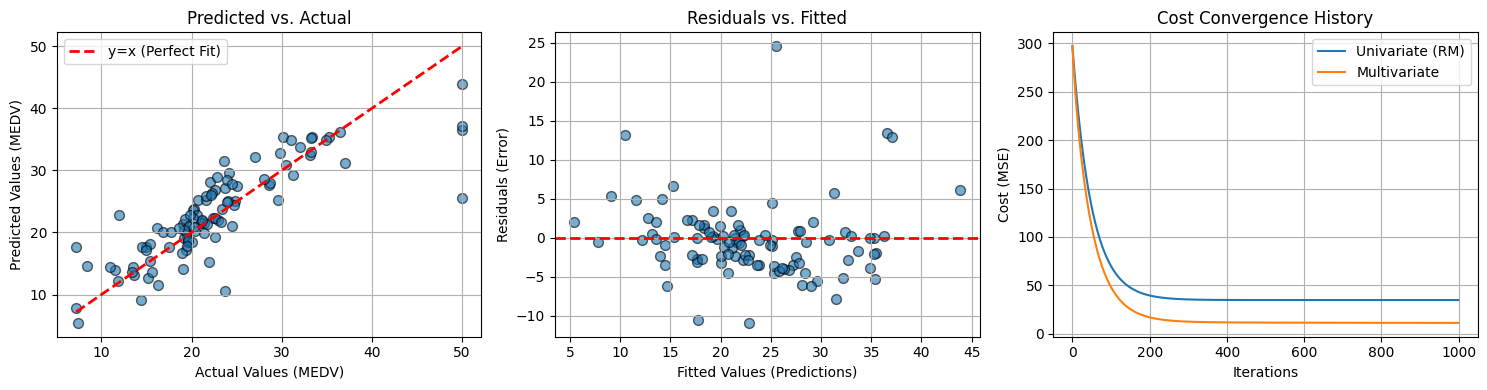

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# --- Plot 1: Predicted vs. Actual Values ---
# Make final predictions on the test set using the multivariate model's theta
y_pred_multi_final = X_test_bias @ theta_multi

# Create the scatter plot with actual values on the x-axis and predicted on the y-axis
axes[0].scatter(y_test, y_pred_multi_final, alpha=0.6, edgecolors='k', s=50)
# Add a y=x line, which represents a perfect prediction
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='y=x (Perfect Fit)')
axes[0].set_xlabel("Actual Values (MEDV)")
axes[0].set_ylabel("Predicted Values (MEDV)")
axes[0].set_title("Predicted vs. Actual")
axes[0].grid(True)
axes[0].legend()

# --- Plot 2: Residuals vs. Fitted Values ---
# Calculate the residuals (errors)
residuals = y_test - y_pred_multi_final
# Plot residuals against the predicted values
axes[1].scatter(y_pred_multi_final, residuals, alpha=0.6, edgecolors='k', s=50)
# Add a horizontal line at y=0 to indicate the baseline of zero error
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel("Fitted Values (Predictions)")
axes[1].set_ylabel("Residuals (Error)")
axes[1].set_title("Residuals vs. Fitted")
axes[1].grid(True)

# --- Plot 3: Cost Convergence History ---
# Plot the cost (MSE) at each iteration for both models
axes[2].plot(cost_uni_history, label='Univariate (RM)')
axes[2].plot(cost_multi_history, label='Multivariate')
axes[2].set_xlabel("Iterations")
axes[2].set_ylabel("Cost (MSE)")
axes[2].set_title("Cost Convergence History")
axes[2].grid(True)
axes[2].legend()

# Use tight_layout to prevent titles and labels from overlapping
plt.tight_layout()
plt.show()